In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/superstore/Superstore.xls


In [3]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
ss = pd.read_excel('/kaggle/input/superstore/Superstore.xls')
ss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Analysis Based on the Superstore Dataset**

#### **1. Calculate profit for each state and sub_category for year 2016.**

**Step 1:** Filter the dataset: Select only the data for the year 2016

**Step 2:** Groupby the state and sub-category

**step 3:** Aggregate the profit

In [5]:
ss.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
ss_2016 = ss[ss['Order Date'].dt.year == 2016]

# Group by State and Sub_Category and calculate total sales, costs, and profit
profits = ss_2016.groupby(['State', 'Sub-Category']).agg(
    Total_Profit=('Profit', 'sum')).reset_index()

# Print the results
print(profits)

         State Sub-Category  Total_Profit
0      Alabama  Accessories      606.6238
1      Alabama   Appliances       56.2032
2      Alabama          Art       66.8910
3      Alabama      Binders      112.3364
4      Alabama       Chairs       84.2352
..         ...          ...           ...
455  Wisconsin       Labels       29.2593
456  Wisconsin        Paper      333.4322
457  Wisconsin       Phones      228.6513
458  Wisconsin      Storage       32.2944
459    Wyoming       Chairs      100.1960

[460 rows x 3 columns]


#### **2. Find 5 sub_categories which have performed low in 2017.**

In [19]:
# Filter the DataFrame for the year 2017
ss_2017 = ss[ss['Order Date'].dt.year == 2017]

# Group by Sub_Category and calculate the total profit
subcat_profit = ss_2017.groupby('Sub-Category')['Profit'].sum()

# Sort the subcategories by profit in ascending order
low_performing_subcats = subcat_profit.sort_values().head(5)

# Print the low performing subcategories
print("Low Performing Subcategories in 2017:\n")
print(low_performing_subcats) 

Low Performing Subcategories in 2017:

Sub-Category
Tables      -8140.6947
Machines    -2869.2156
Supplies     -955.3128
Bookcases    -583.6261
Fasteners     304.9489
Name: Profit, dtype: float64


#### **3. Find 5 states which needs marketing.**

In [20]:
# Group by State and calculate the total profit
state_profit = ss.groupby('State')['Profit'].sum()

# Sort the states by profit in ascending order
states_needing_marketing = state_profit.sort_values().head(5)

# Print the states needing marketing
print("States Needing Marketing:\n")
print(states_needing_marketing)

States Needing Marketing:

State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Name: Profit, dtype: float64


#### **4. XYZ company wants to launch a new phone. They want to know from us which 2 states are good to go for offline launch.**

In [21]:
# Group by State and calculate the total sales
state_sales = ss.groupby('State')['Sales'].sum()

# Sort the states by sales in descending order
top_states_for_offline_launch = state_sales.sort_values(ascending=False).head(2)

# Print the top states for offline launch
print("Top States for Offline Launch:")
print(top_states_for_offline_launch)

Top States for Offline Launch:
State
California    457687.6315
New York      310876.2710
Name: Sales, dtype: float64


#### **5. Marketing Manager of Furniture category wants to start a discount coupon. Find out which states need this type of strategy.**

In [23]:
# Filter the DataFrame for the Furniture category
furniture_ss = ss[ss['Category'] == 'Furniture']

# Group by State and calculate the total sales
state_furniture_sales = furniture_ss.groupby('State')['Sales'].sum()

# Filter states that have sales below a certain threshold (you can adjust the threshold as needed)
states_needing_discount_coupon = state_furniture_sales[state_furniture_sales < 1000]

# Print the states needing the discount coupon strategy
print("States Needing Discount Coupon Strategy for Furniture:")
print(states_needing_discount_coupon)

States Needing Discount Coupon Strategy for Furniture:
State
Kansas           111.120
Maine            109.480
Montana           63.980
South Dakota     324.900
West Virginia    673.344
Name: Sales, dtype: float64


#### **6. Find top 5 customers who have purchased the most in each category.**

In [24]:
# Group by Category and Customer, calculate the total sales, and sort within each group
top_customers_by_category = ss.groupby(['Category', 'Customer Name'])['Sales'].sum().reset_index()
top_customers_by_category = top_customers_by_category.groupby('Category').apply(lambda x: x.nlargest(5, 'Sales'))

# Print the top customers by category
print("Top 5 Customers by Category:")
print(top_customers_by_category)

Top 5 Customers by Category:
                             Category         Customer Name      Sales
Category                                                              
Furniture       613         Furniture           Seth Vernon   8332.090
                337         Furniture            Joe Elijah   6920.136
                538         Furniture          Peter Fuller   6837.348
                116         Furniture       Caroline Jumper   6267.194
                279         Furniture             Greg Tran   6219.260
Office Supplies 1374  Office Supplies          Sanjit Chand  12081.258
                713   Office Supplies         Adrian Barton  11489.256
                1145  Office Supplies          Ken Lonsdale   9654.950
                863   Office Supplies  Christopher Martinez   8725.172
                955   Office Supplies          Edward Hooks   8667.576
Technology      2089       Technology           Sean Miller  23481.508
                2127       Technology          T

#### **7. Find top 5 customers who have purchsed the most in each category (without using window functions)**

In [25]:
# Group by Category and Customer, calculate the total sales for each group
customer_sales_by_category = ss.groupby(['Category', 'Customer Name'])['Sales'].sum().reset_index()

# Create an empty DataFrame to store the top customers by category
top_customers_by_category = pd.DataFrame(columns=['Category', 'Customer Name', 'Sales'])

# Iterate over each category
for category in customer_sales_by_category['Category'].unique():
    
    # Filter the DataFrame for the current category
    category_ss = customer_sales_by_category[customer_sales_by_category['Category'] == category]
    
    # Sort the DataFrame by sales in descending order and select the top 5 customers
    top_customers = category_ss.sort_values('Sales', ascending=False).head(5)
    
    # Append the top customers to the final DataFrame
    top_customers_by_category = top_customers_by_category.append(top_customers)

# Print the top customers by category
print("Top 5 Customers by Category:")
print(top_customers_by_category)

Top 5 Customers by Category:
             Category         Customer Name      Sales
613         Furniture           Seth Vernon   8332.090
337         Furniture            Joe Elijah   6920.136
538         Furniture          Peter Fuller   6837.348
116         Furniture       Caroline Jumper   6267.194
279         Furniture             Greg Tran   6219.260
1374  Office Supplies          Sanjit Chand  12081.258
713   Office Supplies         Adrian Barton  11489.256
1145  Office Supplies          Ken Lonsdale   9654.950
863   Office Supplies  Christopher Martinez   8725.172
955   Office Supplies          Edward Hooks   8667.576
2089       Technology           Sean Miller  23481.508
2127       Technology          Tamara Chand  17997.950
2034       Technology          Raymond Buch  14265.416
2149       Technology          Tom Ashbrook  13709.958
1784       Technology          Hunter Lopez  11640.810


/tmp/ipykernel_34/1363009470.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_customers_by_category = top_customers_by_category.append(top_customers)
/tmp/ipykernel_34/1363009470.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_customers_by_category = top_customers_by_category.append(top_customers)
/tmp/ipykernel_34/1363009470.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_customers_by_category = top_customers_by_category.append(top_customers)


#### **8. Calculate year wise sales for each category without using pivot.**

In [26]:
# Extract the year from the Order_Date column
ss['Year'] = pd.DatetimeIndex(ss['Order Date']).year

# Group by Year and Category, and calculate the total sales
yearly_sales_by_category = ss.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

# Print the yearly sales by category
print("Year-wise Sales by Category:")
print(yearly_sales_by_category)

Year-wise Sales by Category:
    Year         Category        Sales
0   2014        Furniture  157192.8531
1   2014  Office Supplies  151776.4120
2   2014       Technology  175278.2330
3   2015        Furniture  170518.2370
4   2015  Office Supplies  137233.4630
5   2015       Technology  162780.8090
6   2016        Furniture  198901.4360
7   2016  Office Supplies  183939.9820
8   2016       Technology  226364.1800
9   2017        Furniture  215387.2692
10  2017  Office Supplies  246097.1750
11  2017       Technology  271730.8110


#### **9. Find top 3 products by sales for each city for the year 2017.**

In [28]:
# Filter the DataFrame for the year 2017
ss_2017 = ss[ss['Order Date'].dt.year == 2017]

# Group by City, Product_ID, and calculate the total sales
top_products_by_city = ss_2017.groupby(['City', 'Product ID'])['Sales'].sum().reset_index()

# Sort by sales within each city group and select the top 3 products
top_products_by_city = top_products_by_city.groupby('City').apply(lambda x: x.nlargest(3, 'Sales'))

# Print the top products by city for the year 2017
print("Top 3 Products by Sales for Each City (Year 2017):")
print(top_products_by_city)

Top 3 Products by Sales for Each City (Year 2017):
                   City       Product ID    Sales
City                                             
Aberdeen 0     Aberdeen  OFF-SU-10004661   25.500
Abilene  1      Abilene  OFF-AP-10001634    1.392
Akron    9        Akron  OFF-ST-10000142  665.408
         2        Akron  FUR-TA-10001539  284.364
         10       Akron  OFF-ST-10002574  221.024
...                 ...              ...      ...
Yonkers  3223   Yonkers  TEC-AC-10004114  163.960
         3224   Yonkers  TEC-MA-10003173   52.440
York     3227      York  OFF-PA-10001033   65.584
         3226      York  OFF-BI-10004492   37.896
Yuma     3228      Yuma  TEC-MA-10001148  599.985

[815 rows x 3 columns]


#### **10. Which combination of product category and sub-category has the highest average discount rate, and how does it compare to the overall average discount rate.**

In [29]:
# Calculate the average discount rate for each combination of category and sub-category
cat_subcat_avg_discount = ss.groupby(['Category', 'Sub-Category'])['Discount'].mean()

# Find the combination with the highest average discount rate
highest_avg_discount = cat_subcat_avg_discount.idxmax()
highest_avg_discount_rate = cat_subcat_avg_discount.max()

# Calculate the overall average discount rate
overall_avg_discount_rate = ss['Discount'].mean()

# Print the results
print("Combination with Highest Average Discount Rate:")
print("Category: ", highest_avg_discount[0])
print("Sub-Category: ", highest_avg_discount[1])
print("Average Discount Rate: {:.2f}%".format(highest_avg_discount_rate * 100))
print("\nOverall Average Discount Rate: {:.2f}%".format(overall_avg_discount_rate * 100))

Combination with Highest Average Discount Rate:
Category:  Office Supplies
Sub-Category:  Binders
Average Discount Rate: 37.23%

Overall Average Discount Rate: 15.62%


#### **11. What is the correlation between the quantity sold and the profit for each sub-category.**

In [30]:
# Calculate the correlation between quantity and profit for each sub-category
corr_subcat = ss.groupby('Sub-Category')['Quantity', 'Profit'].corr().iloc[0::2, -1]

# Print the correlation for each sub-category
print("Correlation between Quantity and Profit for each Sub-Category:")
print(corr_subcat)

Correlation between Quantity and Profit for each Sub-Category:
Sub-Category          
Accessories   Quantity    0.284962
Appliances    Quantity    0.208141
Art           Quantity    0.357391
Binders       Quantity    0.017687
Bookcases     Quantity   -0.080579
Chairs        Quantity    0.279386
Copiers       Quantity    0.335542
Envelopes     Quantity    0.332170
Fasteners     Quantity    0.441261
Furnishings   Quantity    0.214692
Labels        Quantity    0.345240
Machines      Quantity    0.050179
Paper         Quantity    0.365190
Phones        Quantity    0.246384
Storage       Quantity    0.207616
Supplies      Quantity   -0.027762
Tables        Quantity   -0.134123
Name: Profit, dtype: float64


/tmp/ipykernel_34/2199200402.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corr_subcat = ss.groupby('Sub-Category')['Quantity', 'Profit'].corr().iloc[0::2, -1]


#### **12. Which customer segment has the highest average order value, and how does it compare to other segments?**

In [31]:
# Calculate the average order value for each customer segment
avg_order_value_by_segment = ss.groupby('Segment')['Sales'].mean()

# Find the segment with the highest average order value
highest_avg_order_value_segment = avg_order_value_by_segment.idxmax()
highest_avg_order_value = avg_order_value_by_segment.max()

# Calculate the overall average order value
overall_avg_order_value = ss['Sales'].mean()

# Print the results
print("Segment with Highest Average Order Value:")
print("Segment: ", highest_avg_order_value_segment)
print("Average Order Value: $", round(highest_avg_order_value, 2))
print("\nOverall Average Order Value: $", round(overall_avg_order_value, 2))

Segment with Highest Average Order Value:
Segment:  Home Office
Average Order Value: $ 240.97

Overall Average Order Value: $ 229.86


#### **13. Are there any seasonal patterns in sales for the office supplies category?**

/tmp/ipykernel_34/1437578419.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_supplies_ss['Month'] = pd.DatetimeIndex(office_supplies_ss['Order Date']).month


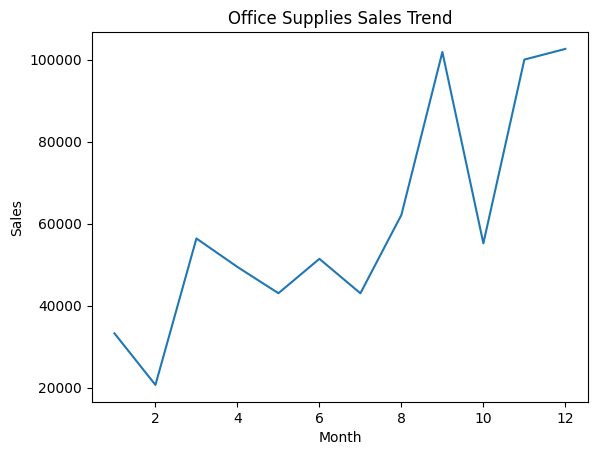

In [32]:
import matplotlib.pyplot as plt

# Assuming you have the Superstore dataset as a pandas DataFrame called 'df'

# Filter the DataFrame for the 'Office Supplies' category
office_supplies_ss = ss[ss['Category'] == 'Office Supplies']

# Extract the month from the 'Order_Date' column
office_supplies_ss['Month'] = pd.DatetimeIndex(office_supplies_ss['Order Date']).month

# Group by month and calculate the total sales
monthly_sales = office_supplies_ss.groupby('Month')['Sales'].sum()

# Plot the sales trend
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Office Supplies Sales Trend')
plt.show()

#### **14. Which shipping mode has the highest customer satisfaction rating, and does it vary across different product categories?**

In [38]:
import random

# Generate a random integer values for the our customer satisfaction column
rand_values = [random.randint(1, 10) for _ in range(len(ss))]
ss['Customer Satisfaction'] = rand_values

# Calculate the average customer satisfaction rating for each shipping mode and product category
avg_satisfaction_by_ship_mode = ss.groupby(['Ship Mode', 'Category'])['Customer Satisfaction'].mean()

# Find the shipping mode with the highest average satisfaction rating for each category
highest_satisfaction_by_category = avg_satisfaction_by_ship_mode.groupby('Category').idxmax()
highest_satisfaction_rating = avg_satisfaction_by_ship_mode.loc[highest_satisfaction_by_category]

# Print the results
print("Shipping Mode with Highest Customer Satisfaction Rating for Each Category:\n")
print(highest_satisfaction_rating)

Shipping Mode with Highest Customer Satisfaction Rating for Each Category:

Ship Mode       Category       
Same Day        Furniture          5.789916
Standard Class  Office Supplies    5.558274
Same Day        Technology         5.428571
Name: Customer Satisfaction, dtype: float64


#### **15. Can we identify any geographic clusters based on customer purchasing behavior?**

In [40]:
ss['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [43]:
from geopy.geocoders import Nominatim

state = ['Kentucky', 'California', 'Florida', 'North Carolina', 'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska', 'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware', 'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee', 'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio', 'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut', 'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island', 'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland', 'District of Columbia', 'Kansas', 'Vermont', 'Maine', 'South Dakota', 'Idaho', 'North Dakota', 'Wyoming', 'West Virginia']

geolocator = Nominatim(user_agent='my_unique_application')

# Function to get latitude and longitude for a given state
def get_coordinates(state):
    location = geolocator.geocode(state + ', USA')
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Create an empty dataframe to store the coordinates
coordinates = pd.DataFrame(columns=['State', 'Latitude', 'Longitude'])

# Fetch the coordinates for each state
for s in state:
    lat, lon = get_coordinates(s)
    coordinates = coordinates.append({'State': s, 'Latitude': lat, 'Longitude': lon}, ignore_index=True)

# Print the coordinates dataframe
print(coordinates)

/tmp/ipykernel_34/2211374126.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinates = coordinates.append({'State': s, 'Latitude': lat, 'Longitude': lon}, ignore_index=True)
/tmp/ipykernel_34/2211374126.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinates = coordinates.append({'State': s, 'Latitude': lat, 'Longitude': lon}, ignore_index=True)
/tmp/ipykernel_34/2211374126.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinates = coordinates.append({'State': s, 'Latitude': lat, 'Longitude': lon}, ignore_index=True)
/tmp/ipykernel_34/2211374126.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinates =

                   State   Latitude   Longitude
0               Kentucky  37.572603  -85.155141
1             California  36.701463 -118.755997
2                Florida  27.756767  -81.463983
3         North Carolina  35.672964  -79.039292
4             Washington  38.895037  -77.036543
5                  Texas  31.263890  -98.545612
6              Wisconsin  44.430898  -89.688464
7                   Utah  39.422519 -111.714358
8               Nebraska  41.737023  -99.587382
9           Pennsylvania  40.969989  -77.727883
10              Illinois  40.079661  -89.433729
11             Minnesota  45.989659  -94.611329
12              Michigan  43.621195  -84.682435
13              Delaware  38.692045  -75.401331
14               Indiana  40.327013  -86.174693
15              New York  40.712728  -74.006015
16               Arizona  34.395342 -111.763275
17              Virginia  37.123224  -78.492772
18             Tennessee  35.773008  -86.282008
19               Alabama  33.258882  -86

/tmp/ipykernel_34/2211374126.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinates = coordinates.append({'State': s, 'Latitude': lat, 'Longitude': lon}, ignore_index=True)


In [45]:
# Merge the dataframes based on the 'State' column
ss1 = pd.merge(ss, coordinates, on='State', how='left')
ss1.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Customer Satisfaction,Latitude,Longitude
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,9,37.572603,-85.155141
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,5,37.572603,-85.155141
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,8,36.701463,-118.755997
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,27.756767,-81.463983
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,7,27.756767,-81.463983


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

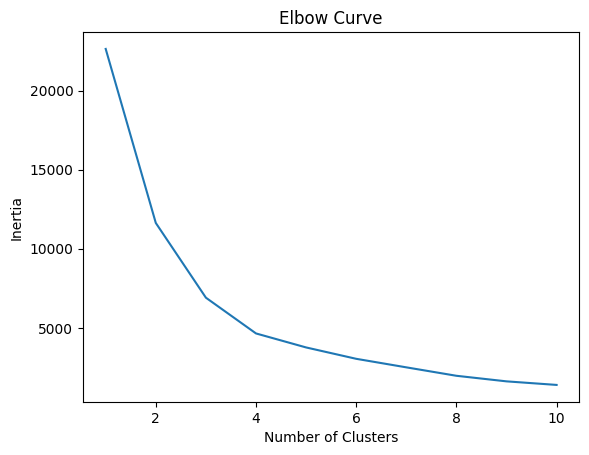

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


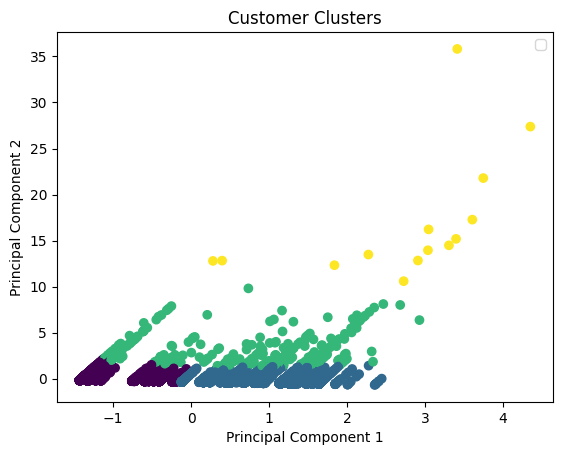

Cluster Centers:
   Latitude  Longitude      Sales  Cluster
0 -0.832317  -0.832238  -0.119291        0
1  0.661791   0.662164  -0.129054        1
2  0.183245   0.177195   3.125813        2
3  0.372354   0.339060  17.141284        3


In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select relevant columns for clustering
clustering = ss1[['Customer ID', 'Latitude', 'Longitude', 'Sales']]

# Drop rows with missing values
clustering = clustering.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering[['Latitude', 'Longitude', 'Sales']])

# Perform Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to identify the optimal number of clusters
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Based on the elbow curve, select the optimal number of clusters
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
clustering['Cluster'] = labels

# Visualize the clusters on a scatter plot
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clusters')
plt.legend()
plt.show()

# Print the cluster centers
cluster_centers = pca.inverse_transform(kmeans.cluster_centers_)
cluster_centers_ss = pd.DataFrame(cluster_centers, columns=['Latitude', 'Longitude', 'Sales'])
cluster_centers_ss['Cluster'] = range(n_clusters)
print("Cluster Centers:")
print(cluster_centers_ss)